### single TLU network

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # iris Setosa

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

### Building an Image Classifier Using the Sequential API

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

2023-05-17 17:17:21.588878: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 17:17:22.171741: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 17:17:25.613185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
x_valid, x_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

### Createing the model using the Sequential API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

2023-05-17 16:13:59.464404: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-05-17 16:13:59.464511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: sheded-Latitude-E6520
2023-05-17 16:13:59.464535: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: sheded-Latitude-E6520
2023-05-17 16:13:59.464747: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 390.157.0
2023-05-17 16:13:59.464831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 390.157.0
2023-05-17 16:13:59.464855: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 390.157.0


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
model.layers[1].name

'dense'

In [12]:
model.get_layer('dense').name

'dense'

In [13]:
weights, biases = model.get_layer('dense').get_weights()

In [14]:
weights.shape

(784, 300)

In [15]:
biases.shape

(300,)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

2023-05-17 16:14:11.961229: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6941 - accuracy: 0.7711 - val_loss: 0.5209 - val_accuracy: 0.8208
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4903 - accuracy: 0.8294 - val_loss: 0.4619 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4455 - accuracy: 0.8437 - val_loss: 0.4206 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4192 - accuracy: 0.8537 - val_loss: 0.3944 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3985 - accuracy: 0.8601 - val_loss: 0.4094 - val_accuracy: 0.8552
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3814 - accuracy: 0.8657 - val_loss: 0.3888 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3682 - accuracy: 0.8701 - val_loss: 0.3600 - val_acc

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

NameError: name 'history' is not defined

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 61.4783 - accuracy: 0.8501


[61.478336334228516, 0.8500999808311462]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 185ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Building a Regression MLP Using the Sequential API

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
X_train_scaled.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

2023-05-17 17:17:53.847078: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-05-17 17:17:53.847245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: sheded-Latitude-E6520
2023-05-17 17:17:53.847361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: sheded-Latitude-E6520
2023-05-17 17:17:53.847583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 390.157.0
2023-05-17 17:17:53.847642: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 390.157.0
2023-05-17 17:17:53.847663: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 390.157.0


In [10]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_valid_scaled, y_valid))

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 1.0026 - val_loss: 0.5141
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4881 - val_loss: 0.5535
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4401 - val_loss: 0.5874
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4209 - val_loss: 0.6552
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4104 - val_loss: 0.7176
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4029 - val_loss: 0.8231
Epoch 7/50
363/363 [==============================] - 2s 5ms/step - loss: 0.3975 - val_loss: 0.8175
Epoch 8/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3926 - val_loss: 0.9002
Epoch 9/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3891 - val_loss: 0.9316
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3909 - val_loss: 1.0559

In [11]:
mse_test = model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3430


In [12]:
mse_test

0.34302130341529846

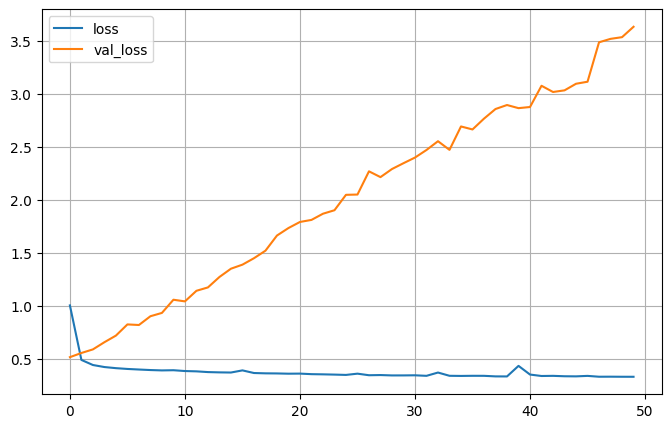

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.show()

In [14]:
x_new = X_test_scaled[:3]
model.predict(x_new)

1/1 [==============================] - 0s 160ms/step


array([[1.8447022],
       [2.8537335],
       [1.3868922]], dtype=float32)

## Building a complex models using the functional API

In [15]:
input = keras.layers.Input(shape=X_train.shape[1:])
hiddin1= keras.layers.Dense(30, activation='relu')(input)
hiddin2 = keras.layers.Dense(30, activation='relu')(hiddin1)
concat = keras.layers.concatenate([input, hiddin2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])
model.compile(loss='mean_squared_error', optimizer='sgd')

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50)

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
363/363 [==============================] - 1s 3

#### But what if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path

In [36]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hiddin1=keras.layers.Dense(30, activation='relu')(input_B)
hiddin2= keras.layers.Dense(30, activation='relu')(hiddin1)
concat= keras.layers.concatenate([hiddin2, input_A])
output=keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss='mean_squared_error', optimizer='sgd')

In [37]:
X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test[:, 2:]

write your own custom callbacks. For exam‐
ple, the following custom callback will display the ratio between the validation loss
and the training loss during training

In [40]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
ratio_cb = PrintValTrainRatioCallback()
history = model.fit((X_train_A, X_train_B), y_train, epochs=100, validation_data=((X_valid_A, X_valid_B), y_valid), callbacks=[early_stopping_cb, ratio_cb])

Epoch 1/100
345/363 [===========================>..] - ETA: 0s - loss: 0.4466
val/train: 1.21
363/363 [==============================] - 1s 3ms/step - loss: 0.4490 - val_loss: 0.5424
Epoch 2/100
362/363 [============================>.] - ETA: 0s - loss: 0.4561
val/train: 1.28
363/363 [==============================] - 1s 3ms/step - loss: 0.4562 - val_loss: 0.5843
Epoch 3/100
345/363 [===========================>..] - ETA: 0s - loss: 0.4296
val/train: 1.48
363/363 [==============================] - 1s 2ms/step - loss: 0.4308 - val_loss: 0.6367
Epoch 4/100
355/363 [============================>.] - ETA: 0s - loss: 0.4278
val/train: 1.67
363/363 [==============================] - 1s 3ms/step - loss: 0.4281 - val_loss: 0.7164
Epoch 5/100
341/363 [===========================>..] - ETA: 0s - loss: 0.4156
val/train: 2.05
363/363 [==============================] - 1s 2ms/step - loss: 0.4153 - val_loss: 0.8496
Epoch 6/100
360/363 [============================>.] - ETA: 0s - loss: 0.4046
val/tra

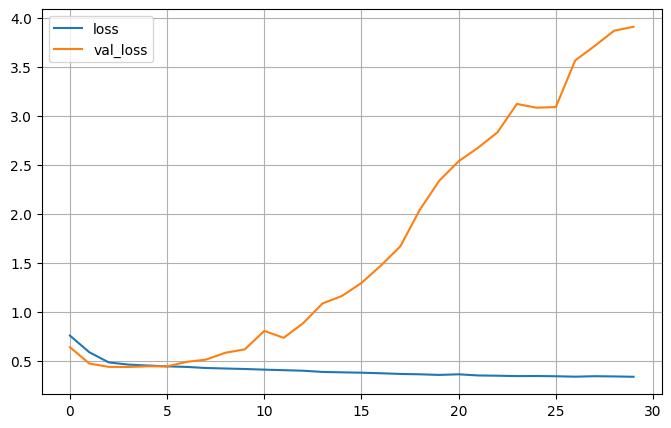

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.show()

### Saving and Restoring a Model

In [30]:
model.save('model.h5')

In [31]:
model = keras.models.load_model('model.h5')